# Visualizing Ford GoBike  
### by Merve Yalcinkaya


## Investigation Overview

* When are most trips taken in weekdays?

* How long does the average trip take?

* What is the proportion of subscribers?

* What is the gender distribution for renting GoBikes?

* What age group rides bikes the most?

* Is there any relation between the day of trip and user type based on gender?

* Is there any relation between user type, duration length and the day of trip based on gender?


## Dataset Overview

The data includes 183.412 rows and 16 columns which include both categorical and numeric features. The data is in a csv format.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df_ford = df.copy()

In [3]:
df_ford['duration_day'] = pd.to_datetime(df_ford['start_time']).dt.day_name()
df_ford['duration_hour'] = pd.to_datetime(df_ford['start_time']).dt.hour
df_ford['duration_minutes'] = df_ford['duration_sec'] // 60
df_ford['member_age'] = 2019 - df_ford['member_birth_year']
df_ford.drop(df_ford[df_ford.member_birth_year < 1939].index, inplace=True)
df_ford.drop(['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'member_birth_year', 'member_gender', 'member_age'], axis=1)

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_day,duration_hour,duration_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,No,Thursday,17,869
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,37.791464,-122.391034,37.775880,-122.393170,2535,Customer,No,Thursday,18,708
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,No,Thursday,12,1030
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,No,Thursday,17,608
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Yes,Thursday,23,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,4832,Subscriber,No,Friday,0,8
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,4960,Subscriber,No,Friday,0,5
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,3824,Subscriber,Yes,Friday,0,2
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,5095,Subscriber,No,Friday,0,2


## When are most trips taken in weekdays?

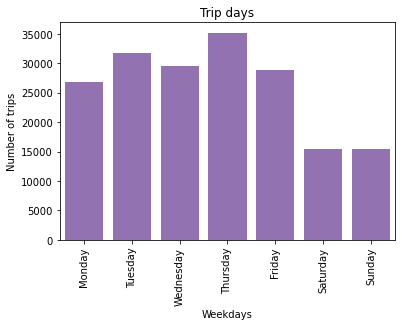

In [6]:
base_color = sb.color_palette()[4]
cat_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sb.countplot(data = df_ford, x = 'duration_day', order = cat_order, color = base_color)
plt.title('Trip days')
plt.xlabel('Weekdays')
plt.ylabel('Number of trips');
plt.xticks(rotation=90);

People tend to rent a bike mostly on Thursdays.

## How long does the average trip take?

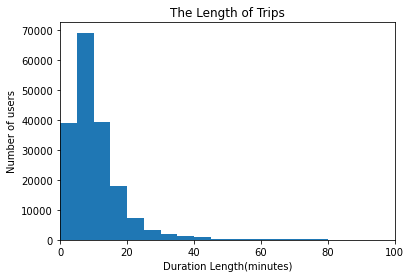

In [18]:
bins = np.arange(0, 100, 5)
plt.hist(data = df_ford, x= 'duration_minutes', bins = bins);
plt.xlim(0,100)
plt.title('The Length of Trips')
plt.xlabel('Duration Length(minutes)')
plt.ylabel('Number of users');

In [ ]:
df_ford['duration_minutes'].mean()

The histogram above shows that people generally rent bikes for between 5 and 15 minutes. Statistically it is in average 11.61.

## What is the proportion of subscribers?

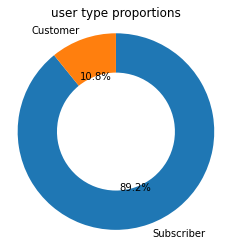

In [19]:
sorted_counts = df_ford['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')
plt.title('user type proportions');

The pie chart shows the distribution of user types above as 89% of users are subscribes.

## What is the gender distribution for renting GoBikes?


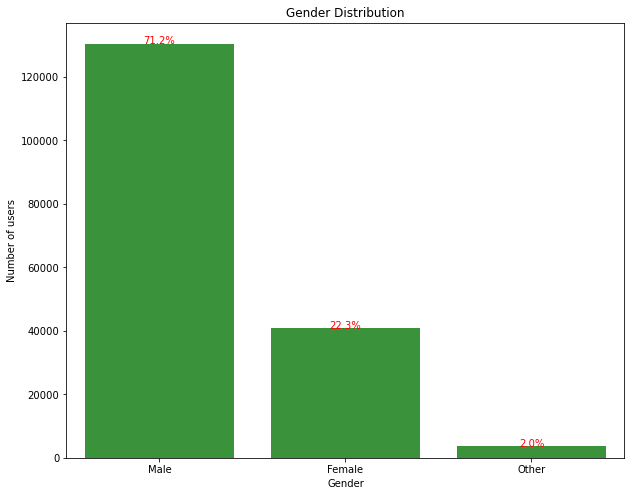

In [25]:
# distribution of gender visualization
plt.figure(figsize=[10, 8])

base_color = sb.color_palette()[2]
gender_order = df_ford['member_gender'].value_counts().index
sb.countplot(data = df_ford, x = 'member_gender', color = base_color, order=gender_order)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of users')

#frequencies of gender distribution
n_points = df_ford.shape[0]
gender_counts = df_ford['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='r');

plt.show()      

The plot shows that male proportion is 71%, female proportion is %22 and other proportion is approximately %0.07.

## What age group rides bikes the most?

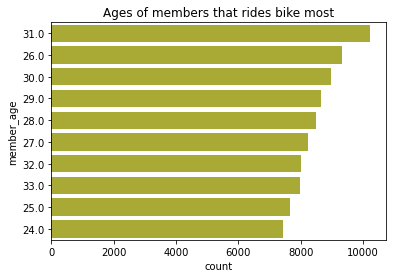

In [20]:
member_age_order = df_ford['member_age'].value_counts().head(10)
sb.countplot(data = df_ford, y = 'member_age', color = sb.color_palette()[8],
            order = (member_age_order.index));
plt.title('Ages of members that rides bike most');

The plot displayes the most ten frequent ages of users. According to the data, people between 24 and 31 tend to bikes mostly, and the most frequent age is 31.

## Is there any relation between the day of trip and user type based on  gender?

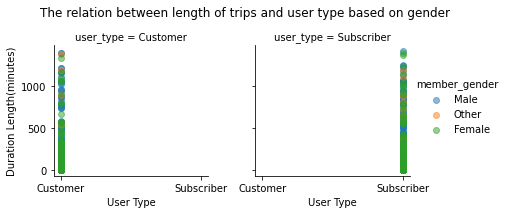

In [26]:
# The relation between user type and duration length based on gender
m = sb.FacetGrid(data=df_ford ,col = 'user_type' , hue = 'member_gender')
m.map(plt.scatter , 'user_type','duration_minutes' , alpha = 0.5).add_legend()
m.set_xlabels('User Type' , size = 10)
m.set_ylabels('Duration Length(minutes)')
m.set_xticklabels()
m.fig.subplots_adjust(top=.8) #setting title to the top
m.fig.suptitle('The relation between length of trips and user type based on gender', size=12);

The scatter plot shows that female tends to have longer minutes biking than males. Also, subscriber females have longer trips than customer females. Customer females prefer to have less longer trips than customer males.

## Is there any relation between user type, duration length and the day of trip based on gender?

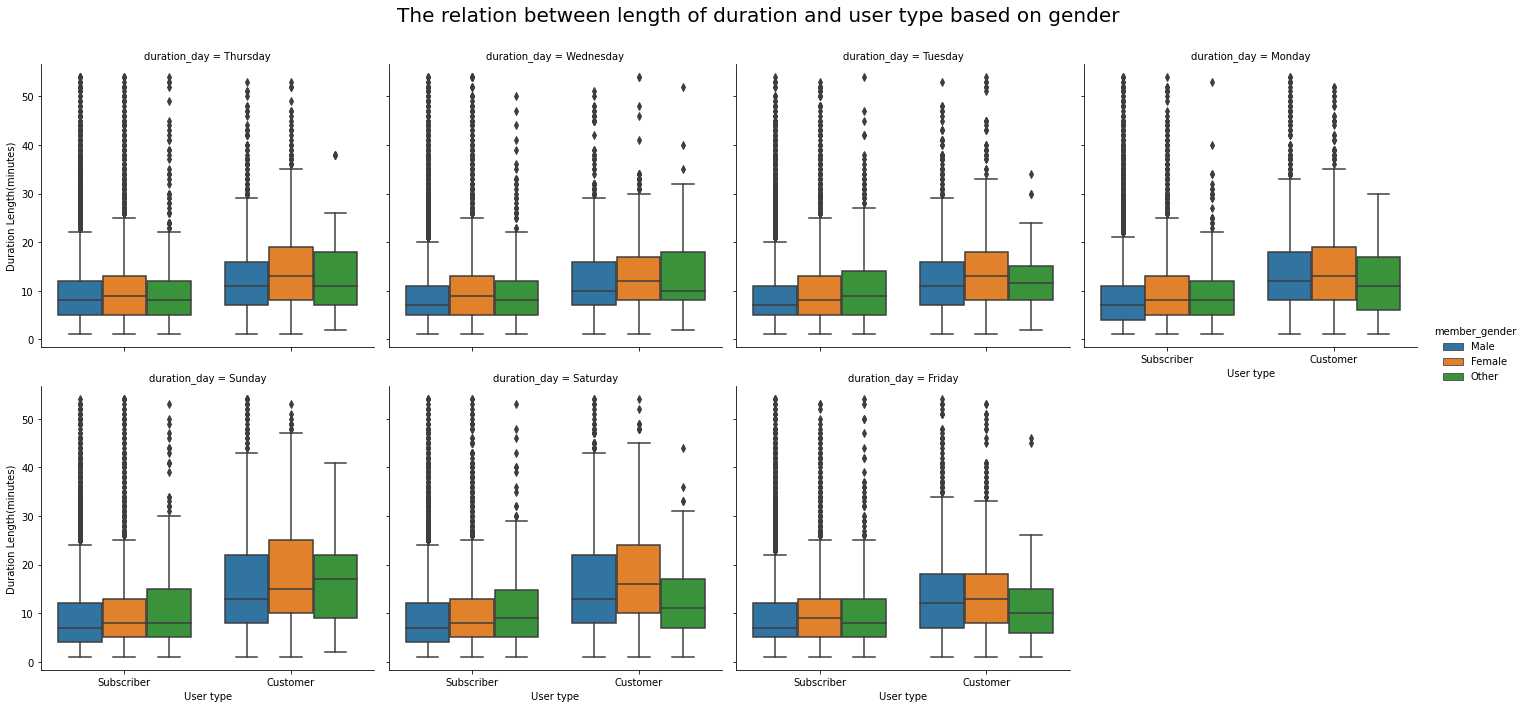

In [22]:
#The relation between length of duration and user type based on gender
d = sb.factorplot(x="user_type", y="duration_minutes", col = "duration_day", hue="member_gender",col_wrap=4, kind="box",
                  data=df_ford.query('duration_minutes < 55'))
d.set_xlabels('User type')
d.set_ylabels('Duration Length(minutes)')
d.fig.subplots_adjust(top=.9) #setting title to the top
d.fig.suptitle('The relation between length of duration and user type based on gender', size=20);

From the week-day comparison visualization plot based on user_type and duration lenght represents a trend for both customer males and females, that are tend to ride longer minutes on the the weekend. 